In [8]:
from plot_service import *
from numpy import *

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

from keras.wrappers.scikit_learn import KerasRegressor

In [3]:
train_file = 'datasets/redshifts.csv'

X = loadtxt(train_file, usecols=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10), unpack=True, delimiter=',').T
Y = loadtxt(train_file, unpack=True, usecols=(11), delimiter=',')

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print('Data loaded!')

Data loaded!


In [4]:
plot_simple_table(X_train.T[:, :30])

| 20.8201 | 18.5113 | 17.2795 | 16.7894 | 16.4611 | 0.181395  | 0.0123181  | 0.00690208 | 0.00650488 | 0.0170449  |
| 19.1041 | 17.3282 | 16.304  | 15.8546 | 15.5137 | 0.0542467 | 0.00679417 | 0.00442695 | 0.00423764 | 0.00878743 |
| 20.6168 | 18.5021 | 17.3794 | 16.9137 | 16.5403 | 0.147581  | 0.0111245  | 0.00677101 | 0.00662477 | 0.0145896  |
| 22.0622 | 20.1525 | 18.4359 | 17.706  | 17.2676 | 0.56777   | 0.051707   | 0.0177945  | 0.0141868  | 0.0334817  |
| 20.2099 | 18.3034 | 17.2462 | 16.819  | 16.4606 | 0.0796464 | 0.00858408 | 0.00567301 | 0.00556344 | 0.0111667  |
| 20.7708 | 18.6046 | 17.3616 | 16.9112 | 16.5767 | 0.126928  | 0.0101941  | 0.00598473 | 0.00575985 | 0.0128102  |
| 22.5801 | 20.5084 | 18.6342 | 17.8495 | 17.4039 | 1.10245   | 0.0779481  | 0.0216593  | 0.0163227  | 0.0391475  |
| 18.8676 | 17.5225 | 17.0249 | 16.7668 | 16.6301 | 0.0523219 | 0.00970681 | 0.00734196 | 0.00740002 | 0.0195377  |
| 19.3541 | 17.5048 | 16.5986 | 16.1868 | 15.886  | 0.0433344 | 0.005688

In [28]:
def create_baseline_model():
    model = Sequential()
    model.add(Dense(300, input_dim=10, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(150, activation='relu'))
    model.add(Dropout(0.05))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mse', optimizer='adam', metrics=['mse'])
    
    return model

In [29]:
model = KerasRegressor(build_fn=create_baseline_model)
hist = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30)
preds = model.predict(X_test)

Train on 279216 samples, validate on 69804 samples
Epoch 1/30
279216/279216 [==============================] - 21s 75us/step - loss: 0.0216 - mean_squared_error: 0.0216 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 2/30
279216/279216 [==============================] - 21s 76us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 3/30
279216/279216 [==============================] - 21s 76us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 4/30
279216/279216 [==============================] - 22s 79us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 5/30
279216/279216 [==============================] - 22s 79us/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 6/30
279216/279216 [==============================] - 22s 80us/step - loss: 0.0021 - mean_squ

In [30]:
pred = preds.reshape(len(preds))
real = y_test

plot_table(real, pred)

|     Real |   Predict |
|----------+-----------|
| 0.202258 | 0.137764  |
| 0.384286 | 0.303092  |
| 0.033815 | 0.0527015 |
| 0.635514 | 0.496133  |
| 0.082844 | 0.121241  |
| 0.077451 | 0.186046  |
| 0.173062 | 0.176862  |
| 0.140931 | 0.164377  |
| 0.042802 | 0.0771742 |
| 0.080199 | 0.105305  |
| 0.159216 | 0.157188  |
| 0.275251 | 0.279099  |
| 0.137887 | 0.152176  |
| 0.242895 | 0.191232  |
| 0.085739 | 0.133276  |
| 0.167368 | 0.187164  |
| 0.049474 | 0.0898647 |
| 0.389837 | 0.322859  |
| 0.175565 | 0.168887  |
| 0.12229  | 0.120863  |
| 0.18369  | 0.178969  |
| 0.066047 | 0.103039  |
| 0.101232 | 0.152142  |
| 0.188021 | 0.194155  |
| 0.25487  | 0.338632  |
| 0.088456 | 0.138796  |
| 0.135544 | 0.151733  |
| 0.333799 | 0.32128   |
| 0.257815 | 0.268258  |
| 0.066265 | 0.119458  |
| 0.085536 | 0.145266  |
| 0.380118 | 0.341444  |
| 0.14705  | 0.147475  |
| 0.503077 | 0.471922  |
| 0.071456 | 0.145588  |
| 0.001909 | 0.260279  |
| 0.146141 | 0.147726  |
| 0.343    | 0.293713  |


In [31]:
score = model.score(X_val, y_val)
print('Cross-Val Score:', score)

69804/69804 [==============================] - 2s 26us/step
Cross-Val Score: -0.00234010414629


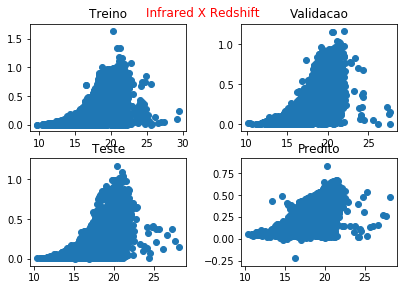

In [32]:
plot_scatter(X_train, y_train, X_val, y_val, X_test, y_test, preds, show_only=True)

### Adhafera:

![](adhafera/ann/redshift.png)

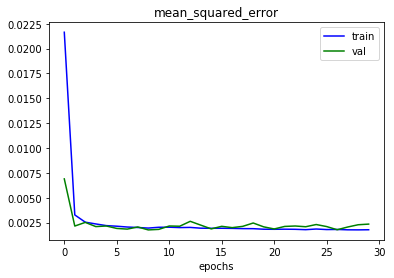

In [33]:
plot(hist.history, 'mean_squared_error', show_only=True)

### Adhafera:

![](adhafera/ann/mse.png)

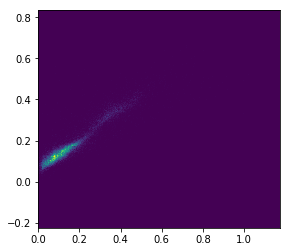

In [34]:
plot_hm(real, pred, show_only=True)

### Adhafera:

![](adhafera/ann/hm.png)